<img src = "images/Logo.png" width = 220, align = "left">

<h1 align=center><font size = 6><span style="color:blue">Is Height Hereditary?</span></font></h1>
<h2 align=center><font size = 5>Lab Exercise 2.1</font></h2>
<h3 align=center><font size = 4><b>Advanced Machine Learning Made Easy<br></b><small>From Theory to Practice with NumPy and scikit-learn<br><i>Volume 1: Generalized Linear Models</i></font></h3>

## Introduction

In this lab exercise we will have a quick tour in the linear regression by taking the original dataset used by Galton in his publication:<br>
Galton, F. (1886).  Regression Towards Mediocrity in Hereditary Stature, Journal of the Anthropological Institute, 15, pp. 246-263

The dataset contains height in inches of hundred of members of families. The goal is to find the so-called "law of regression" as Galton called the relationship between the parents' mid-height and their children's height. This lab exercise will not focus on every detail, that will be done in later exercises, just shows the essence of the linear regression. <br>
**Note**: *The dataset was taken from the **Hist** package of the R language.*

### Table of contents
1. [Reading the data](#ReadingData)
2. [Scatter plot of the observations](#ScatterPlot)
3. [Average of children's height for different parents' mid height](#AvgChildHeight)
4. [The "law of regression"](#RegressionLaw)
5. [Regression using multiple input variables](#MultiRegression)

## 1. Reading the data <a name="ReadingData"></a>

As a first step, we import the required libraries. More information on installation and documentation for the libraries can be found in the following list:
- NumPy (http://www.numpy.org/) is used for array manipulations (vectors and matrices), 
- pandas (https://pandas.pydata.org/) is used for database manipulations,
- matplotlib (https://matplotlib.org/) is used for making nice graphics,
- scipy (https://www.scipy.org/) is a scientific library,
- seaborn (https://seaborn.pydata.org/) is a statistical graphical package based on matplotlib,
- statsmodels (https://www.statsmodels.org/stable/index.html) is a module containing several statistical models,
- sklearn module (https://scikit-learn.org/stable/) is a collection of machine learning algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import os
%matplotlib inline

Let's read the dataset and print out the first 20 rows of it to have the first glimpse of the data.

In [2]:
data = pd.read_csv(os.path.join('data','GaltonFamilies.csv'))
data.head(20)

,Unnamed: 0,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5
5,6,002,75.5,66.5,73.66,4,2,male,72.5
6,7,002,75.5,66.5,73.66,4,3,female,65.5
7,8,002,75.5,66.5,73.66,4,4,female,65.5
8,9,003,75.0,64.0,72.06,2,1,male,71.0
9,10,003,75.0,64.0,72.06,2,2,female,68.0


Examining the dataset we can observe that in each family (identified by the *family* column) the height of both the father and mother is given in inches, and their average is also calculated and stored in column *midparentHeight*. Then the number of children in the family is provided (*children*), together with a child identifier within the family (*childNum*). Finally, the gender (*gender*) and height (*childHeight*) of the children are provided.

## 2. Scatter plot of the observations <a name="ScatterPlot"></a>

Let's make a scatter plot of the children's height vs. their parent's height. At the same time draw a line that reflects the linear relation between the parent's mid-height and their children's average height, called the regression line. In later lab exercises, we will have a deep mathematical understanding of how this line is defined. However, for the moment, we will just try to figure out what a regression line represents.

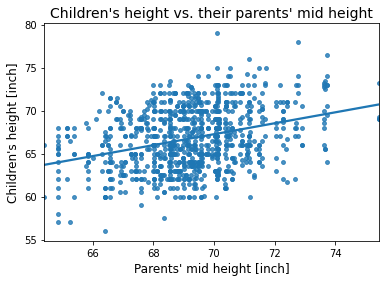

In [3]:
sns.regplot(x='midparentHeight',y='childHeight',ci=None,data=data,scatter_kws={"s": 15})
plt.title("Children's height vs. their parents' mid height",size=14)
plt.xlabel("Parents' mid height [inch]",size=12)
plt.ylabel("Children's height [inch]",size=12)
plt.show()

This is how far a simple linear regression is discussed in most online training or blog. While we will provide in later exercises an accurate mathematical formulation for the linear regression line, for the moment we will only see an intuitive example of how this line is obtained.

## 3. Average of children's height for different parents' mid height <a name="AvgChildHeight"></a>

Let's see what is the difference between the maximum and minimum value of the *midparentHeight*.

In [4]:
print(data.midparentHeight.max()-data.midparentHeight.min())

11.030000000000001


That is almost an integer value, thus let's divide the *midparentHeight* into eleven intervals, called bins, where the length of each interval is around one inch. Then create a new column, called *Parents' mid height*, which stores the bin value (interval) of the *midparentHeight* for that particular row.

In [5]:
data["Parents' mid height"]=pd.cut(data.midparentHeight,11)
data.head()

,Unnamed: 0,family,father,mother,midparentHeight,children,childNum,gender,childHeight,Parents' mid height
0,1,001,78.5,67.0,75.43,4,1,male,73.2,"(74.427, 75.43]"
1,2,001,78.5,67.0,75.43,4,2,female,69.2,"(74.427, 75.43]"
2,3,001,78.5,67.0,75.43,4,3,female,69.0,"(74.427, 75.43]"
3,4,001,78.5,67.0,75.43,4,4,female,69.0,"(74.427, 75.43]"
4,5,002,75.5,66.5,73.66,4,1,male,73.5,"(73.425, 74.427]"


Now, let's make another scatter plot, but at this time we will use a different color for every bin (interval). 

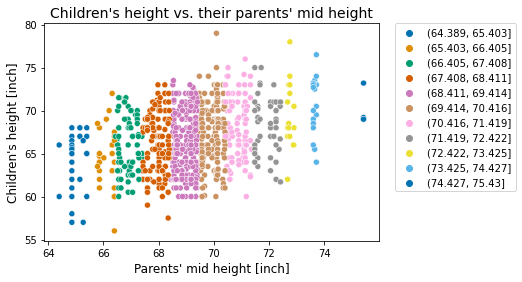

In [6]:
sns.scatterplot(x='midparentHeight',y='childHeight',palette='colorblind',hue="Parents' mid height",data=data)
plt.title("Children's height vs. their parents' mid height",size=14)
plt.xlabel("Parents' mid height [inch]",size=12)
plt.ylabel("Children's height [inch]",size=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We may create a so-called histogram, by counting the number of observations falling into each bin (interval) and then creating a plot where, for each interval, a vertical bar is created, proportionally with the number of observations.

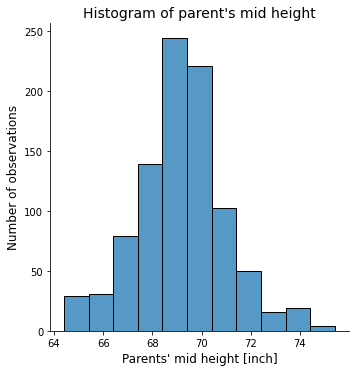

In [7]:
sns.displot(data=data, x='midparentHeight',kind='hist',bins=11,kde=False, rug=False)
plt.title("Histogram of parent's mid height",fontsize=14)
plt.xlabel("Parents' mid height [inch]",size=12)
plt.ylabel("Number of observations",fontsize=12)
plt.show()

Let's see the mean (average) value of each bin (interval):

In [8]:
data.groupby("Parents' mid height")['childHeight'].mean()

Parents' mid height
(64.389, 65.403]    64.144828
(65.403, 66.405]    64.264516
(66.405, 67.408]    65.665823
(67.408, 68.411]    66.161871
(68.411, 69.414]    66.236475
(69.414, 70.416]    67.333937
(70.416, 71.419]    67.841176
(71.419, 72.422]    68.232000
(72.422, 73.425]    69.500000
(73.425, 74.427]    70.415789
(74.427, 75.43]     70.100000
Name: childHeight, dtype: float64

Calculate both the average of the parents' mid-height and the children's height for the whole dataset.

In [9]:
print(data['midparentHeight'].mean())
print(data['childHeight'].mean())

69.20677301927185
66.74593147751597


Then let's convert the interval to integer values which can be used for our drawing:

In [10]:
parentsIntHeight=[int(pd.to_numeric(data.groupby("Parents' mid height")['childHeight'].mean().index[i].left))+1 \
                  for i in range(11)]
print(parentsIntHeight)

[65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


Finally, make a scatter plot of the children's mean height vs. these integer values of parent's mid-height. We can also draw the regression line that we have done before using all the data points.

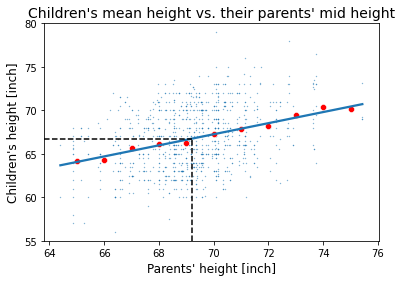

In [11]:
sns.regplot(x='midparentHeight',y='childHeight',ci=None,data=data,scatter_kws={"s": 0.1})
sns.scatterplot(x=parentsIntHeight,y=data.groupby("Parents' mid height")['childHeight'].mean().to_numpy(),color='red')
#,data=data)
plt.title("Children's mean height vs. their parents' mid height",size=14)
plt.xlabel("Parents' height [inch]",size=12)
plt.ylabel("Children's height [inch]",size=12)
plt.xlim(data['midparentHeight'].min()-0.6,data['midparentHeight'].max()+0.6)
plt.ylim(data['childHeight'].min()-1,data['childHeight'].max()+1)
plt.plot((data['midparentHeight'].mean(),data['midparentHeight'].mean()),(plt.ylim()[0],data['childHeight'].mean()),'--',c='k')
plt.plot((plt.xlim()[0],data['midparentHeight'].mean()),(data['childHeight'].mean(),data['childHeight'].mean()),'--',c='k')
plt.show()

As we can see in the figure above the mean values of the children's height are almost residing on the regression line. 

Thus, the interpretation of the regression line is as follows: it shows that for a given value of the parent's mid-height what would be the expected average value of the children's height. This regression line can be used for predicting a child's height for any given value of parents' mid-height.

## 4. The "law of regression" <a name="RegressionLaw"></a>

We can check the slope of the regression line to see to what degree the height of the children regresses toward mediocracy. In other words, we can analyze how much of parents' height is inherited by the children.

In [12]:
reg = LinearRegression().fit(data['midparentHeight'].to_numpy().reshape(-1, 1),data['childHeight'])
reg.coef_[0]

0.6373608969694792

This slope measures that if the parents' mid-height is one inch taller then on average their children would be 0.63 inches taller. In other words, only approximately 2/3 of the parents' height would be inherited by their children.

Now, let's check the score of the regression model (we will see in later lab exercises how the score is defined). The score is between 0 and 1, and the greater the value the better.

In [13]:
reg.score(data['midparentHeight'].to_numpy().reshape(-1, 1),data['childHeight'])

0.1030088357834662

As can be seen, the score is quite low.

Now, let's calculate the correlation coefficient which is a measure of how the two variables are correlated to each other (in our example how parents' mid-height is correlating with children's height). In other words how their variability is tied to each other.

In [14]:
scipy.stats.pearsonr(data['midparentHeight'],data['childHeight'])[0]

0.3209498960639593

It should be emphasized that the slope of the regression line is not the same as the correlation coefficient. As we can observe in the scatter plot of the data points there is much variability in the children's height. The correlation coefficient tells us, that only approximately 1/3 of the children's height variability can be explained by the parents' mid-height, 2/3 is related to other factors.

Finally, we can have more detailed statistics of this regression. Again, in later lab exercises, the meaning of each item in the statistical summary will be provided.

In [15]:
model = ols(formula = 'childHeight ~ midparentHeight', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            childHeight   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           8.05e-24
Time:                        20:23:35   Log-Likelihood:                -2465.0
No. Observations:                 934   AIC:                             4934.
Df Residuals:                     932   BIC:                             4944.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          22.6362      4.265     

## 5. Regression using multiple input variables <a name="MultiRegression"></a>

We can also observe from the dataset that the children's height also depends on the gender of the children. Male children tend to be taller than female children, as can be seen on the below plot of distributions (distribution are rotated with 90 degrees and mirrored around the vertical axis).

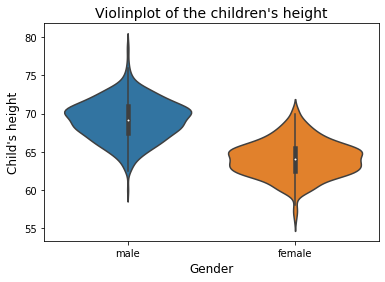

In [16]:
sns.violinplot(x=data['gender'],y=data['childHeight'])
plt.xlabel("Gender",fontsize=12)
plt.ylabel("Child's height",fontsize=12)
plt.title("Violinplot of the children's height",fontsize=14)
plt.show()

So, let's make another scatter plot, but at this time we take into account the gender of the child by using a different color for the data points associated with male or female children. Then a separate regression line is created for each group of the data points (these are parallel lines).

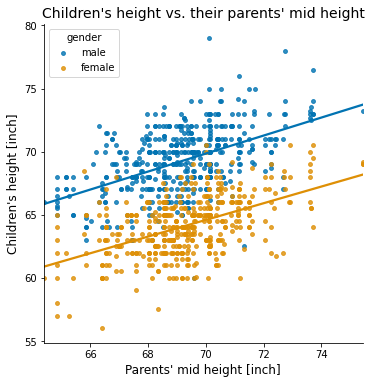

In [17]:
sns.lmplot(x='midparentHeight',y='childHeight',palette='colorblind',hue='gender',ci=None,legend_out=False,\
       data=data,scatter_kws={"s": 15})
plt.title("Children's height vs. their parents' mid height",size=14)
plt.xlabel("Parents' mid height [inch]",size=12)
plt.ylabel("Children's height [inch]",size=12)
plt.show()

As we can observe from the scatter plot, on average female children are smaller than male children. We will see soon how much is that difference. In the next step, we create a new column, called *Cat*, which value is 1 if the child is male and 0 otherwise.

In [18]:
data['Cat'] = data.apply(lambda row: 1 if row.gender=='male' else 0, axis=1)
data.head()

,Unnamed: 0,family,father,mother,midparentHeight,children,childNum,gender,childHeight,Parents' mid height,Cat
0,1,001,78.5,67.0,75.43,4,1,male,73.2,"(74.427, 75.43]",1
1,2,001,78.5,67.0,75.43,4,2,female,69.2,"(74.427, 75.43]",0
2,3,001,78.5,67.0,75.43,4,3,female,69.0,"(74.427, 75.43]",0
3,4,001,78.5,67.0,75.43,4,4,female,69.0,"(74.427, 75.43]",0
4,5,002,75.5,66.5,73.66,4,1,male,73.5,"(73.425, 74.427]",1


Next, we can check the coefficient of the regression lines. The coefficient of the *Cat* variable will provide the difference between the two parallel lines.

In [19]:
reg.fit(data[['midparentHeight','Cat']],data['childHeight'])
print("Slope of the lines =",reg.coef_[0])
print("Difference between the lines =",reg.coef_[1])

Slope of the lines = 0.6870152119086933
Difference between the lines = 5.215105407386692


Thus, the slope of the regression line is slightly higher than what we had when the gender of the children was not counted, while the difference between the height of the male and female children on average is 5.2 inches. 

Let's, calculate the score of the new regression:

In [20]:
reg.score(data[['midparentHeight','Cat']],data['childHeight'])

0.6332150090835275

As it can be observed, the score increased significantly showing that the regression model which takes into account the gender of the child is much better.<br>

We can check the correlation coefficient (correlation matrix) of the three variables: *midparentHeight*, *Cat*(*gender*), and *childHeight*.

In [21]:
data[['midparentHeight','Cat','childHeight']].corr(method='pearson')

,midparentHeight,Cat,childHeight
midparentHeight,1.000000,-0.034319,0.320950
Cat,-0.034319,1.000000,0.716709
childHeight,0.320950,0.716709,1.000000


From the correlation matrix is clear that the correlation coefficient between *Cat*(associated with *gender*) and *childHeight* is much higher, namely 0.72, compared to the correlation coefficient between *childHeight* and *midparentHeight*, the latter being only 0.32.

Again, we can make a full summary of the statistical model:

In [22]:
model = ols(formula = 'childHeight ~ midparentHeight + C(gender)', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            childHeight   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     803.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.71e-203
Time:                        20:23:36   Log-Likelihood:                -2047.4
No. Observations:                 934   AIC:                             4101.
Df Residuals:                     931   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.5141      2.73

From the dataset, we can also observe that not only the parents' mid-height but the height of father and mother are also provided. So let's check whether one of the parents has a greater influence on the child's height. We can also visualize the scatter plot in a 3D graph. 

For this, let's calculate the coefficients for each input variable: father, mother, and gender:

In [23]:
reg.fit(data[['father','mother','Cat']],data['childHeight'])
print("Regression coefficients:",reg.coef_)
print("Regression intercept:",reg.intercept_)

Regression coefficients: [0.39284333 0.31761007 5.21498935]
Regression intercept: 16.521239904483757


Then create two arrays in which we store the values of heights for the two genders.

In [24]:
X1=data[data['gender']=='male'][['father','mother','childHeight']].to_numpy()
X2=data[data['gender']=='female'][['father','mother','childHeight']].to_numpy()

Finally, we can make the 3D scatter plots together with the two parallel regression planes (we have now planes and not lines).<br>
(The 3rd line in the code below should creates a pop-up window in which you can drag the picture with your mouse and rotate it.)

In [25]:
from mpl_toolkits import mplot3d
from matplotlib import cm
%matplotlib qt

ax3d=plt.figure(figsize=(8,6)).gca(projection='3d')
ax3d.scatter(X1[:,0], X1[:,1], X1[:,2], c='b', alpha=1,s=10,label='male')
ax3d.scatter(X2[:,0], X2[:,1], X2[:,2], c='tab:orange', alpha=1,s=10,label='female')
# Creating the meshgrid for x (father),y(mother) and calculating the value of z (surface)
xx, yy = np.meshgrid(np.arange(62,80,1), np.arange(58,70,1))
zz = reg.intercept_+reg.coef_[2]+reg.coef_[0]*xx+reg.coef_[1]*yy
ax3d.plot_surface(xx, yy, zz, cmap=cm.Blues, linewidth=0, antialiased=False, alpha=0.7)
zz = reg.intercept_+reg.coef_[0]*xx+reg.coef_[1]*yy
ax3d.plot_surface(xx, yy, zz, cmap=cm.Oranges, linewidth=0, antialiased=False, alpha=0.7)
# Adding labels, titles, and legend
ax3d.set_xlabel("Father's height [inch]")
ax3d.set_ylabel("Mother's height [inch]")
ax3d.set_zlabel("Child's height [inch]")
ax3d.view_init(elev=20., azim=-45)
plt.legend(loc=(0.6,0.2))
plt.title("Children's height vs. their parents' height",size=14)
plt.show()

Let's check how much the score of the regression model improves by taking into account separately the height of both the father and mother (instead of taking the average of them). 

In [26]:
reg.fit(data[['father','mother','Cat']],data['childHeight'])
print("Score of the regression:",reg.score(data[['father','mother','Cat']],data['childHeight']))

Score of the regression: 0.6354066409556642


The score did not increase significantly, only a very minor improvement can be seen. Thus, this model does not provide a significantly better prediction over the other model which considered only the mid-height of the parents together with the gender of the child.

We can close our exercise by creating a summary of the statistical model:

In [27]:
model = ols(formula = 'childHeight ~ father + mother + C(gender)', data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            childHeight   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     540.3
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.38e-203
Time:                        20:23:37   Log-Likelihood:                -2044.6
No. Observations:                 934   AIC:                             4097.
Df Residuals:                     930   BIC:                             4117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            16.5212      2.72

<img src = "images/AML1-Cover.png" width = 110, align = "left" style="margin:0px 20px">

<span style="color:blue">**Note:**</span> This Jupyter Notebook is accompanying the book: <br> $\qquad$ <b>Advanced Machine Learning Made Easy</b> <br> $\qquad$ From Theory to Practice with NumPy and scikit-learn <br> $\qquad$ <i> Volume 1: Generalized Linear Models</i><br>
by Ferenc Farkas, Ph.D. 

If you find this Notebook useful, please support me by buying the book at [Leanpub](http://leanpub.com/AML1). <br>
Copyright notice: This Jupyter Notebook is made available under the [MIT License](https://opensource.org/licenses/MIT).